<a href="https://colab.research.google.com/github/cdsalazard/Indice_refracci-n_lamina_delgada/blob/main/codigo_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%matplotlib widget 
# para que la figura se muestre en el notebook
# %matplotlib inline 
# para que quede la figura guardada en el pdf

In [2]:
%reset -f

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# import sys
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
#import import ipynb
# import shapely
# from shapely.geometry import LineString, Point
from scipy.signal import argrelextrema
import statistics as stats

In [4]:
def cm2inch(cm: float) -> float:
    return cm / 2.54

In [5]:
def valor_de_s(T_s: float) -> float:
    return (1/T_s) + (((1/(T_s ** 2)) - 1) ** (1/2))

In [6]:
def valor_de_n1(s: float, T_M, T_m):
    termino1 = 2 * s * ((T_M - T_m)/(T_M * T_m))
    termino2 = ((s**2) + 1)/2
    N = termino1 + termino2
    return (N + (((N**2) - (s**2)) ** (1/2))) ** (1/2)

In [7]:
def valor_indice_n(x, a, b, c):
    return (a/(x ** 2)) + (b/x) + c

In [8]:
# def valor_indice_n(x, a, c):
#     return (a/(x ** 2)) - c

In [9]:
def valor_de_x_T_M(n, s, T_M):
    E_M = ((8 * (n ** 2) * s)/T_M) + (((n ** 2) - 1) * ((n ** 2) - (s ** 2)))
    termino1 = E_M - (((E_M ** 2) - ((((n ** 2) - 1) ** 3) * ((n ** 2) - (s ** 4)))) ** (1/2))
    termino2 = ((n - 1) ** 3) * (n - (s ** 2))
    return termino1/termino2

In [10]:
def valor_de_alfa_T_M(x, d):
    return - np.log(x)/d

In [11]:
def valor_de_k_T_M(alfa, lambdda):
    return (alfa * lambdda) / (4 * np.pi)

In [12]:
def transmitancia(x, n, k, s, d, lambdda):
    A = 16 * s * ((n ** 2) + (k ** 2))
    B = (((n + 1) ** 2) + (k ** 2)) * (((n + 1) * (n + (s ** 2))) + (k ** 2))
    phi = (4 * np.pi * n * d)/lambdda
    C1 = ((((n**2)-1+(k**2)) * ((n**2)-(s**2)+(k**2))) - 2*(k**2)*((s**2)+1)) * 2*np.cos(phi)
    C2 = ((2*((n**2)-(s**2)+(k**2))) + (((s**2)+1)*((n**2)-1+(k**2)))) * k*2*np.sin(phi)
    C = C1 - C2
    D = (((n-1)**2) + (k**2)) * (((n-1)*(n-(s**2))) + (k**2))
    
    return (A * x)/(B - (C * x) + (D * (x ** 2)))

In [13]:
print(np.cos(360 * (np.pi/180)))
print(np.cos((360 * np.pi) * (180/np.pi)))
print(np.cos(360 * np.pi))
print(np.cos(2 * np.pi))

1.0
0.06083168936868042
1.0
1.0


In [14]:
def transmitancia_T_M(x, n, s, d):
    A = 16 * (n ** 2) * s
    B = ((n + 1) ** 3) * (n + (s ** 2))
    C = 2 * ((n ** 2) - 1) * ((n ** 2) - (s ** 2))
    D = ((n - 1) ** 3) * (n - (s ** 2))
    return (A * x)/(B - (C * x) + (D * (x ** 2)))

In [15]:
def transmitancia_T_m(x, n, s, d):
    A = 16 * (n ** 2) * s
    B = ((n + 1) ** 3) * (n + (s ** 2))
    C = 2 * ((n ** 2) - 1) * ((n ** 2) - (s ** 2))
    D = ((n - 1) ** 3) * (n - (s ** 2))
    return (A * x)/(B + (C * x) + (D * (x ** 2)))

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
lola = pd.read_csv(r"/content/drive/MyDrive/backup/Downloads/data_csv.csv", delimiter = ";")
print(lola)
print("\n\t\t", type(lola))

     longitud_de_onda_(nm)  T_pelicula  T_sustrato  Unnamed: 3
0                      300     0.00000     0.40244         NaN
1                      301     0.00000     0.42705         NaN
2                      302     0.00000     0.45300         NaN
3                      303     0.00000     0.48035         NaN
4                      304     0.00000     0.50917         NaN
..                     ...         ...         ...         ...
795                   1096     0.62196     0.91546         NaN
796                   1097     0.62709     0.91546         NaN
797                   1098     0.63235     0.91546         NaN
798                   1099     0.63775     0.91547         NaN
799                   1100     0.64328     0.91547         NaN

[800 rows x 4 columns]

		 <class 'pandas.core.frame.DataFrame'>


In [18]:
lolax = np.array(lola['longitud_de_onda_(nm)'])
lolay = np.array(lola['T_pelicula'])
lolay2 = np.array(lola['T_sustrato'])

In [19]:
contador = 0

for i in range(len(lolay)):
    if lolay[i] != 0:
        break
    contador += 1
    
print('Posición de el primer valor diferente de cero:', contador)

Posición de el primer valor diferente de cero: 132


In [20]:
x = lolax[132:]
y = lolay[132:]
y2 = lolay2[132:]

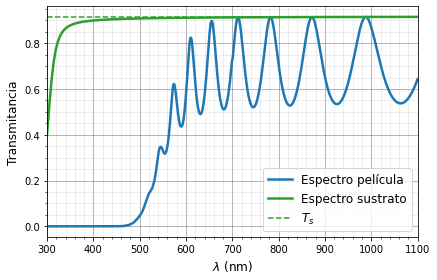

In [21]:
##%matplotlib widget
# %matplotlib inline
plt.figure(1)#, figsize = (fun.cm2inch(26.0), fun.cm2inch(12.0)))
plt.plot(lolax, lolay, linewidth = 2.5, color = "tab:blue", label = "Espectro película")
plt.plot(lolax, lolay2, linewidth = 2.5, color = "tab:green", label = "Espectro sustrato")
plt.hlines(max(lolay2), min(lolax), max(lolax), color = "tab:green", linestyles = 'dashed', label = '$T_s$')
    
plt.ylabel("Transmitancia", fontsize = "large")
plt.xlabel("$\lambda$ (nm)", fontsize = "large")
plt.legend(framealpha = 0.8, fontsize = "large")
plt.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)
plt.tight_layout()
plt.xlim(min(lolax), max(lolax))

# plt.savefig("espectro_experimental.jpg", dpi = 600)

plt.show()

# Cálculo de las envolventes superior ($T_M$) e inferior ($T_m$)

In [22]:
q_u = np.zeros(len(y))
q_l = np.zeros(len(y))

u_x = [0,]
u_y = [y[0],]

l_x = [0,]
l_y = [y[0],]

for k in range(1, len(y)-1):
    if (np.sign(y[k] - y[k-1]) == 1) and (np.sign(y[k] - y[k+1]) == 1):
        u_x.append(k)
        u_y.append(y[k])

    if (np.sign(y[k] - y[k-1]) == -1) and ((np.sign(y[k] - y[k+1])) == -1):
        l_x.append(k)
        l_y.append(y[k])

u_x.append(len(y)-1)
u_y.append(y[-1])

l_x.append(len(y)-1)
l_y.append(y[-1])

u_p = interp1d(u_x, u_y, kind = 'cubic', bounds_error = False, fill_value = 0.0)
l_p = interp1d(l_x, l_y, kind = 'cubic', bounds_error = False, fill_value = 0.0)

for k in range(0, len(x)):
    q_u[k] = u_p(k)
    q_l[k] = l_p(k)

In [23]:
corte = int((len(x)/4))
idx = np.argwhere(np.diff(np.sign(q_u - q_l))).flatten()

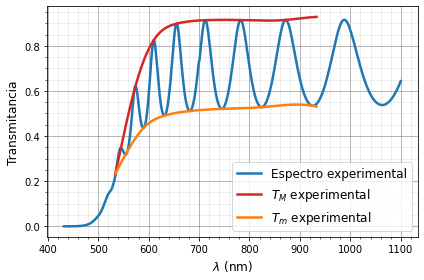

In [24]:
##%matplotlib widget
# %matplotlib inline

plt.figure(2)#, figsize = (fun.cm2inch(26.0), fun.cm2inch(12.0)))
plt.plot(x, y, linewidth = 2.5, color = "tab:blue", label = "Espectro experimental")

plt.plot(x[idx[1]:-corte], q_u[idx[1]:-corte], linewidth = 2.5, color = "tab:red", label = "$T_M$ experimental")
plt.plot(x[idx[1]:-corte], q_l[idx[1]:-corte], linewidth = 2.5, color = "tab:orange", label = "$T_m$ experimental")

# plt.plot(x, q_u, '.', linewidth = 2.5, color = "tab:red")
# plt.plot(x, q_l, '.', linewidth = 2.5, color = "tab:orange")

plt.ylabel("Transmitancia", fontsize = "large")
plt.xlabel("$\lambda$ (nm)", fontsize = "large")
plt.legend(framealpha = 0.8, fontsize = "large")
plt.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)
plt.tight_layout()

# plt.savefig("espectro_experimental_con_envolventes.jpg", dpi = 600)

plt.show()

# Cálculo de el valor de $s$

In [25]:
T_s = max(lolay2)
print('Valor de T_s:', T_s)
s = valor_de_s(T_s)
print('Valor de s:', s)

Valor de T_s: 0.91547
Valor de s: 1.53187568271


# Cálculo de el valor de el índice de refracción $n$ a partir de la fórmula (11) de el pdf:
$$n = [N + (N^2-S^2)^{1/2}]^{1/2}$$
con $N$ como:
$$N = 2s \dfrac{T_M - T_m}{T_M T_m} + \dfrac{s^2+1}{2}$$

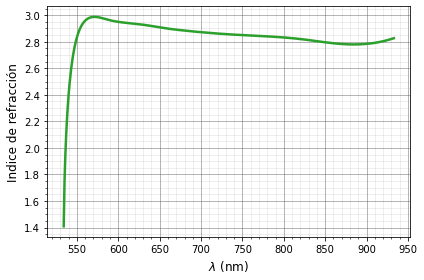

In [26]:
n1 = valor_de_n1(s, q_u[idx[1]:-corte], q_l[idx[1]:-corte])

##%matplotlib widget
# %matplotlib inline

plt.figure(3)#, figsize = (fun.cm2inch(26.0), fun.cm2inch(12.0)))
plt.plot(x[idx[1]:-corte], n1, linewidth = 2.5, color = "tab:green")#, label = "Indice de refracción")

plt.ylabel("Indice de refracción", fontsize = "large")
plt.xlabel("$\lambda$ (nm)", fontsize = "large")
# plt.legend(framealpha = 0.8, fontsize = "large")
plt.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)
plt.tight_layout()

# plt.savefig("indice_de_refraccion_experimental.jpg", dpi = 600)

plt.show()

# Cálculo de los máximo y mínimos locales para así poder calcular el valor de $d$

In [27]:
print('Longitud de y:', len(y))
print('Longitud de n1:', len(n1))

# locations for local maxima
maximos = argrelextrema(y[idx[1]:-corte], np.greater)
print(maximos)
# locations for local minima
minimos = argrelextrema(y[idx[1]:-corte], np.less)
print(minimos)

# asignar el valor de la ubicación de los máximos
# x = lamda y y = valores de transmitancia
x_maximos = x[idx[1]:-corte][maximos] 
y_maximos = y[idx[1]:-corte][maximos]

# asignar el valor de la ubicación de los mínimos
x_minimos = x[idx[1]:-corte][minimos]
y_minimos = y[idx[1]:-corte][minimos]

#Eliminamos el primer valor, que tienen una desviación alta

x_maximos = np.delete(x_maximos,0)
y_maximos = np.delete(y_maximos,0)


x_minimos = np.delete(x_minimos,0)
y_minimos = np.delete(y_minimos,0)

n1_maximos = n1[maximos]
n1_minimos = n1[minimos]

n1_maximos = np.delete(n1_maximos,0)
n1_minimos = np.delete(n1_minimos,0)



print(n1_maximos, n1_minimos)
#n0 es el arreglo que incluye en orden los valores de los indices de refracción
n0 = np.zeros(0)
for i in range(len(n1_maximos) + len(n1_minimos)):
  if i % 2 == 0:
    n0 = np.append(n0,n1_maximos[int(i/2)])
  if i % 2 != 0:
    n0 = np.append(n0,n1_minimos[int(i/2 - 0.5)])
print(n0)

Longitud de y: 668
Longitud de n1: 399
(array([ 11,  40,  76, 121, 177, 247, 337]),)
(array([ 20,  56,  97, 148, 210, 289, 391]),)
[2.98633175 2.94198553 2.90326634 2.86571848 2.83996409 2.78224513] [2.96170925 2.92740294 2.8828868  2.85178222 2.81755158 2.81335037]
[2.98633175 2.96170925 2.94198553 2.92740294 2.90326634 2.8828868
 2.86571848 2.85178222 2.83996409 2.81755158 2.78224513 2.81335037]


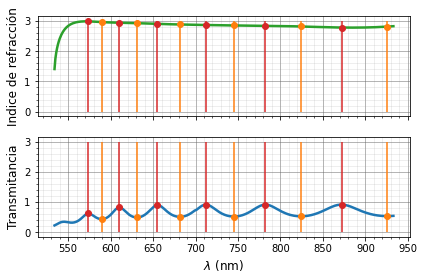

In [28]:
#%matplotlib widget
# %matplotlib inline

# plt.figure(4)#, figsize = (fun.cm2inch(26.0), fun.cm2inch(12.0)))
fig, (ax1, ax2) = plt.subplots(2)

ax2.plot(x[idx[1]:-corte], y[idx[1]:-corte], linewidth = 2.5, color = "tab:blue", label = "Espectro")
ax2.plot(x_maximos, y_maximos, 'o', color = "tab:red")
ax2.plot(x_minimos, y_minimos, 'o', color = "tab:orange")
ax2.vlines(x_maximos, 0, 3, color = "tab:red")
ax2.vlines(x_minimos, 0, 3, color = "tab:orange")
ax2.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
ax2.minorticks_on()
ax2.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)
ax2.set_ylabel("Transmitancia", fontsize = "large")
ax2.set_xlabel("$\lambda$ (nm)", fontsize = "large")

ax1.plot(x[idx[1]:-corte], n1, linewidth = 2.5, color = "tab:green")
ax1.plot(x_maximos, n1_maximos, 'o', color = "tab:red")
ax1.plot(x_minimos, n1_minimos, 'o', color = "tab:orange")
ax1.vlines(x_maximos, 0, 3, color = "tab:red")
ax1.vlines(x_minimos, 0, 3, color = "tab:orange")
ax1.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
ax1.minorticks_on()
ax1.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)
ax1.set_ylabel("Indice de refracción", fontsize = "large")
ax1.label_outer()

plt.tight_layout()

# plt.savefig("ubicación_de_picos.jpg", dpi = 600)

plt.show()

In [29]:
d1_maximos = np.zeros(len(x_maximos) - 1)
d1_minimos = np.zeros(len(x_maximos) - 1)

for i in range(len(x_maximos) - 1):
    d1_maximos[i] = abs((x_maximos[i] * x_maximos[i+1]) / (2 * ((x_maximos[i] * n1_maximos[i+1]) - (x_maximos[i+1] * n1_maximos[i]))))
    d1_minimos[i] = abs((x_minimos[i] * x_minimos[i+1]) / (2 * ((x_minimos[i] * n1_minimos[i+1]) - (x_minimos[i+1] * n1_minimos[i]))))

# Quitamos el primer valor de cada lista, dado que son muy alejados de los demás., esto es, los podemos considerar atipicos
#d1_maximos = np.delete(d1_maximos,0)
#d1_minimos = np.delete(d1_minimos,0)

print(d1_maximos)
print(d1_minimos)

d1 = np.concatenate((d1_maximos, d1_minimos))

d1_maximos_mean = stats.mean(d1_maximos)
d1_maximos_desvest = stats.stdev(d1_maximos)

d1_minimos_mean = stats.mean(d1_minimos)
d1_minimos_desvest = stats.stdev(d1_minimos)

d1_mean = stats.mean(d1)
d1_desvest = stats.stdev(d1)

print('\nValor de d usando los máximos adyacentes:', round(d1_maximos_mean, 1), round(d1_maximos_desvest, 1))
print('Valor de d usando los mínimos adyacentes:', round(d1_minimos_mean, 1), round(d1_minimos_desvest, 1))
print('Valor de d usando todos los datos:', round(d1_mean, 1), round(d1_desvest, 1))

[1316.68532709 1280.54287105 1226.74645222 1271.55966959 1133.73659858]
[1313.92631905 1213.00163793 1252.47000218 1223.87971497 1311.70466474]

Valor de d usando los máximos adyacentes: 1245.9 70.4
Valor de d usando los mínimos adyacentes: 1263.0 47.7
Valor de d usando todos los datos: 1254.4 57.4


# Recalculo de el valor de $d$ y $n$, como lo propone el artículo, ni puta idea esto, me parece que es como un juego de el gato y el ratón, no le veo sentido, pero eso

In [30]:
#Calculamos los m máximos
m_maximos = np.zeros(len(n1_maximos))
for i in range(len(n1_maximos)):
    m_maximos[i] = int(round((2 * n1_maximos[i] * d1_mean)/x_maximos[i], 0))    
#print(m_maximos[i])

d2_maximos = np.zeros(len(m_maximos))
for i in range(len(d2_maximos)):
    d2_maximos[i] = (m_maximos[i] * x_maximos[i])/(2 * n1_maximos[i])
#print(d2_maximos[i])

#Calculamos los m mínimos
m_minimos = np.zeros(len(n1_minimos))
for i in range(len(n1_minimos)):
    m_minimos[i] = round(((2 * n1_minimos[i] * d1_mean)/x_minimos[i])-0.1, 1)    
#print(m_minimos[i])

d2_minimos = np.zeros(len(m_minimos))
for i in range(len(d2_minimos)):
    d2_minimos[i] = (m_minimos[i] * x_minimos[i])/(2 * n1_minimos[i])

d2 = np.concatenate((d2_maximos,d2_minimos))
m = np.concatenate((m_maximos,m_minimos))
m = np.sort(m)[::-1]
print(m)

d2_mean = stats.mean(d2)
d2_desvest = stats.stdev(d2)

x_total = np.concatenate((x_maximos, x_minimos))
x_total = np.sort(x_total)
print(x_total)

print('Valor de d:', d2_mean)
print('Incertidumbre de el valor de d:',d2_desvest)

[13.  12.5 12.  11.5 11.  10.5 10.   9.5  9.   8.5  8.   7.5]
[574 590 610 631 655 682 712 745 782 824 872 926]
Valor de d: 1242.8212092549666
Incertidumbre de el valor de d: 4.98813133516994


3.00204081827395
2.967039806321413
2.9449127297996935
2.9193660141791637
2.8986470243451903
2.880945363127815
2.8644506333570794
2.8473524378630235
2.8314611738156072
2.8177826174203626
2.806517923918397
2.7940462989697914


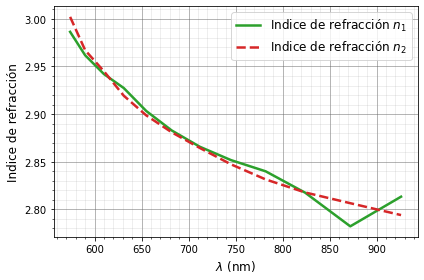

In [31]:
n2 = np.zeros(len(d2))
for i in range(len(n2)):
    n2[i] = (m[i] *x_total[i] )/(2 * d2_mean)
    print(n2[i])

#%matplotlib widget
# %matplotlib inline

plt.figure(5)#, figsize = (fun.cm2inch(26.0), fun.cm2inch(12.0)))
plt.plot(x_total, n0, linewidth = 2.5, color = "tab:green", label = "Indice de refracción $n_1$")
plt.plot(x_total, n2, '--', linewidth = 2.5, color = "tab:red", label = "Indice de refracción $n_2$")

plt.ylabel("Indice de refracción", fontsize = "large")
plt.xlabel("$\lambda$ (nm)", fontsize = "large")
plt.legend(framealpha = 0.8, fontsize = "large")
plt.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)
plt.tight_layout()

# plt.savefig("comparacion_indices_de_refraccion_experimental_y_recalculado.jpg", dpi = 600)

plt.show()

# Ajuste de los valores de $a$ y $c$ dada la fórmula de el índice de refracción:
$$n(\lambda) = \dfrac{a}{\lambda^2} + \dfrac{b}{\lambda} + c$$

In [32]:
p0_initial_guest = np.array([1000, 100, 5])
ans, cov = curve_fit(valor_indice_n, x_total, n2, p0 = p0_initial_guest, sigma = np.sqrt(n2), absolute_sigma = False)
print(ans)
print(cov)

[ 2.92649915e+05 -5.29175794e+02  3.02766611e+00]
[[ 9.42152455e+08 -2.66382819e+06  1.84154197e+03]
 [-2.66382819e+06  7.56326911e+03 -5.25168821e+00]
 [ 1.84154197e+03 -5.25168821e+00  3.66479377e-03]]


In [33]:
a_fit, b_fit, c_fit = ans
a_sigma_fit, b_sigma_fit, c_sigma_fit = np.sqrt(np.diag(cov))

print(int(round(a_fit, 0)), int(round(a_sigma_fit, 0)))
print(int(round(b_fit, 0)), int(round(b_sigma_fit, 0)))
print(round(c_fit, 1), round(c_sigma_fit, 1))

# a_fit, c_fit = ans
# a_sigma_fit, c_sigma_fit = np.sqrt(np.diag(cov))

# print(int(round(a_fit, 0)), int(round(a_sigma_fit, 0)))
# print(round(c_fit, 1), round(c_sigma_fit, 1))

292650 30695
-529 87
3.0 0.1


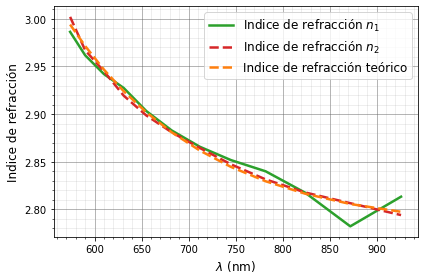

In [34]:
#%matplotlib widget
# %matplotlib inline

plt.figure(6)#, figsize = (fun.cm2inch(26.0), fun.cm2inch(12.0)))
plt.plot(x_total, n0, linewidth = 2.5, color = "tab:green", label = "Indice de refracción $n_1$")
plt.plot(x_total, n2, '--', linewidth = 2.5, color = "tab:red", label = "Indice de refracción $n_2$")

plt.plot(x_total, valor_indice_n(x_total , a_fit, b_fit, c_fit), '--', linewidth = 2.5, color = "tab:orange", label = "Indice de refracción teórico")
# plt.plot(x[idx[1]:-corte], valor_indice_n(x[idx[1]:-corte] , a_fit, c_fit), '--', linewidth = 2.5, color = "tab:orange", label = "Indice de refracción teórico")

plt.ylabel("Indice de refracción", fontsize = "large")
plt.xlabel("$\lambda$ (nm)", fontsize = "large")
plt.legend(framealpha = 0.8, fontsize = "large")
plt.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)
plt.tight_layout()

# plt.savefig("compracion_indices_de_refraccion_experimental_recalculado_y_teorico.jpg", dpi = 600)

plt.show()

# Cálculo de el valor de x dada la fórmula (12) del pdf:
$$x = \dfrac{E_M - (E_M^2-(n^2-1)^3(n^2-s^4))^{1/2}}{(n-1)^3(n-s^2)}$$
con $E_M$ como:
$$E_M = \dfrac{8n^2s}{T_M} + (n^2-1)(n^2-s^2)$$

In [35]:
x_T_M = valor_de_x_T_M(n1, s, q_u[idx[1]:-corte])

# Cálculo de $\alpha$ a partir de despejar la fórmula (5f) de el pdf:
$$\alpha(\lambda) = - \dfrac{\ln(x)}{d}$$

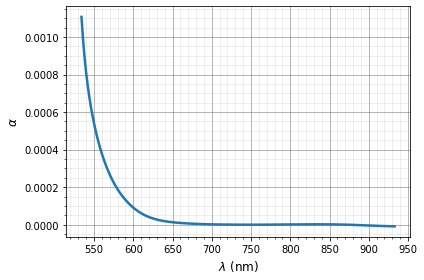

In [36]:
alfa_T_M = valor_de_alfa_T_M(x_T_M, d1_maximos_mean)

#%matplotlib widget
# %matplotlib inline

plt.figure(7)#, figsize = (fun.cm2inch(26.0), fun.cm2inch(12.0)))
plt.plot(x[idx[1]:-corte], alfa_T_M, linewidth = 2.5, color = "tab:blue")#, label = "Indice de refracción $n_1$")

plt.ylabel("$\\alpha$", fontsize = "large")
plt.xlabel("$\lambda$ (nm)", fontsize = "large")
# plt.legend(framealpha = 0.8, fontsize = "large")
plt.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)
plt.tight_layout()

# plt.savefig("valor_de_alfa.jpg", dpi = 600)

plt.show()

# Cálculo de $k$ a partir de la fórmula (27) de el pdf:
$$k=\dfrac{\alpha \lambda}{4 \pi}$$

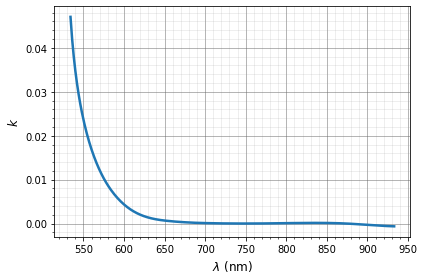

In [37]:
k_T_M = valor_de_k_T_M(alfa_T_M, x[idx[1]:-corte])

#%matplotlib widget
# %matplotlib inline

plt.figure(8)#, figsize = (fun.cm2inch(26.0), fun.cm2inch(12.0)))
plt.plot(x[idx[1]:-corte], k_T_M, linewidth = 2.5, color = "tab:blue")#, label = "Indice de refracción $n_1$")

plt.ylabel("$k$", fontsize = "large")
plt.xlabel("$\lambda$ (nm)", fontsize = "large")
# plt.legend(framealpha = 0.8, fontsize = "large")
plt.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)
plt.tight_layout()

# plt.savefig("valor_de_k.jpg", dpi = 600)

plt.show()

# Cálculo de el espectro de forma teórica usando la formula (A1) de el pdf:
$$T(\lambda) = \dfrac{Ax}{B - Cx + D^2}$$
con:
$$A = 16s(n^2 + k^2)$$
$$B = [(n + 1)^2 + k^2][(n+1)(n+s^2) + k^2]$$
$$C = [(n^2 - 1 +k^2)(n^2 - s^2 + k^2)-2k^2(s^2+1)]2\cos(\varphi) - k[2(n^2-s^2+k^2) + (s^2+1)(n^2-1+k^2)]2\sin(\varphi)$$
$$D = [(n - 1)^2 + k^2][(n-1)(n-s^2) + k^2]$$
$$\varphi = \dfrac{4 \pi nd}{\lambda}$$
$$x = \exp(-\alpha d)$$

In [38]:
T = transmitancia(x_T_M, valor_indice_n(x[idx[1]:-corte], a_fit, b_fit, c_fit), k_T_M, s, d2_mean, x[idx[1]:-corte])
# T = transmitancia(x_T_M, valor_indice_n(x[idx[1]:-corte] , a_fit, c_fit), s, d2_mean, x[idx[1]:-corte])

T_M = transmitancia_T_M(x_T_M, valor_indice_n(x[idx[1]:-corte] , a_fit, b_fit, c_fit), s, d2_mean)
T_m = transmitancia_T_m(x_T_M, valor_indice_n(x[idx[1]:-corte] , a_fit, b_fit, c_fit), s, d2_mean)

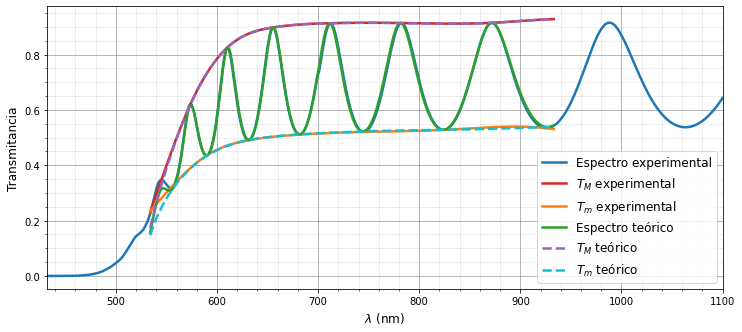

In [39]:
#%matplotlib widget 
# para que la figura se muestre en el notebook
# %matplotlib inline 
# para que quede la figura guardada en el pdf

plt.figure(9, figsize = (cm2inch(26.0), cm2inch(12.0)))
plt.plot(x, y, linewidth = 2.5, color = "tab:blue", label = "Espectro experimental")

plt.plot(x[idx[1]:-corte], q_u[idx[1]:-corte], linewidth = 2.5, color = "tab:red", label = "$T_M$ experimental")
plt.plot(x[idx[1]:-corte], q_l[idx[1]:-corte], linewidth = 2.5, color = "tab:orange", label = "$T_m$ experimental")

plt.plot(x[idx[1]:-corte], T, linewidth = 2.5, color = "tab:green", label = "Espectro teórico")
plt.plot(x[idx[1]:-corte], T_M, '--', linewidth = 2.5, color = "tab:purple", label = "$T_M$ teórico")
plt.plot(x[idx[1]:-corte], T_m, '--', linewidth = 2.5, color = "tab:cyan", label = "$T_m$ teórico")

plt.ylabel("Transmitancia", fontsize = "large")
plt.xlabel("$\lambda$ (nm)", fontsize = "large")
plt.legend(framealpha = 0.8, fontsize = "large")
plt.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)
plt.tight_layout()
plt.xlim(min(x), max(x))

# plt.savefig("comparacion_teorica_y_experimental.jpg", dpi = 600)

plt.show()